In [1]:
import os
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
col = ['k', 'b', 'r', 'g', 'tab:orange', 'm']
mar = ['o', '^', 'v', 's', 'D']

import PyRPDM

path_data = 'data_bos_1/'
if not os.path.exists(path_data):
    os.mkdir(path_data)
else:
    print(f'WARNING: Directory {path_data} already exists')

In [2]:
L = 20 * 10**(-10)
dx = 2**(-7)

dt = 0.5 * (dx)**2
Nt = 1000
T = Nt * dt

n_save = 20
Ndata = 200  # or None


A_D = 10**(-20)
A_L = L
A_C = 100
A_J = A_D * A_C / A_L
A_t = A_L**2/A_D
print(A_L, A_J, A_t)

Temp = 293
Ff = 96485
R = 8.314
A_phi = R*Temp/Ff
phi_ext = 1.5/A_phi

x = np.arange(0, 1+dx, dx)
t = np.arange(0, T+dt, dt)
Nx = len(x)
Nt = len(t)
if Ndata is not None:
    n_save = round((Nt-1) / Ndata)
    if n_save < 1: n_save = 1
Ndata = (Nt - 2) // n_save + 2;
print(Nx, Nt, Ndata, T*A_t)


2e-09 4.999999999999999e-10 400.00000000000006
129 1001 201 12.207031250000002


In [3]:
c_M = np.zeros(Nx)
c_O = np.zeros(Nx)

s = int(0.2/dx)
c_M[:s] = 3.40/x[s] * x[:s]
c_M[s:] = 3.40
c_O[:-s] = (4.20 - (4.20-3.70)/x[-s]*x[:-s])
c_O[-s:] = 3.70*(L - x[-s:])/(L-x[-s])

C_0 = np.concatenate([c_M, c_O])

In [4]:
params = PyRPDM.Params()

params.L = L
params.T = T
params.phi_ext = phi_ext
params.C_0 = C_0
params.x = x
params.t = t
params.n_save = n_save

params.k1_0 = 5 * 10**(-8) / (A_J / A_C)   # reactive
params.k2_0 = 7 * 10**(-8) / A_J
params.k3_0 = 5 * 10**(-8) / A_J
params.k4_0 = 5 * 10**(-8) / (A_J / A_C)    # reactive
params.k5 = 7.5

params.z = [-2, 2]
params.D = [1, 1]

params.A_J = A_J
params.A_D = A_D
params.A_L = A_L
params.A_C = A_C
params.A_t = A_t
params.A_phi = A_phi
params.Temp = Temp

params.eps_0 = 8.85 * 10**(-12)
params.eps_f = 10
params.eps_dl = 10
params.eps_cdl = 78.5
params.d_dl = 0.5 * 10**(-10) / A_L
params.d_cdl = 1 * 10**(-10) / A_L
params.an1 = 0.2
params.an2 = 0.1

params.Ff = Ff
params.R = R

params.Nd = 2


In [5]:
print(params.k1_0, params.k2_0)
print(5 * 10**(-8) * A_L/A_D)
print(params.A_C)

10000.000000000002 140.00000000000003
10000.0
100


In [6]:
id = 1
path = path_data + f'{L:.2f}_{params.k2_0:.1f}_{params.phi_ext*A_phi:.1f}_{id}/'

if not os.path.exists(path):
    os.mkdir(path)
else:
    print(f'WARNING: Directory {path} already exists')

In [7]:
film = PyRPDM.Film(params)

In [8]:
film.solve()

5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
300
305
310
315
320
325
330
335
340
345
350
355
360
365
370
375
380
385
390
395
400
405
410
415
420
425
430
435
440
445
450
455
460
465
470
475
480
485
490
495
500
505
510
515
520
525
530
535
540
545
550
555
560
565
570
575
580
585
590
595
600
605
610
615
620
625
630
635
640
645
650
655
660
665
670
675
680
685
690
695
700
705
710
715
720
725
730
735
740
745
750
755
760
765
770
775
780
785
790
795
800
805
810
815
820
825
830
835
840
845
850
855
860
865
870
875
880
885
890
895
900
905
910
915
920
925


C:\Users\OlegKashurin\anaconda3\lib\site-packages\scipy\optimize\nonlin.py:472: RuntimeWarning: invalid value encountered in double_scalars
  and dx_norm/self.x_rtol <= x_norm))


930
935
940
945
950
955
960
965
970
975
980
985
990
995
1000
Finished!


# Visualisation

## General

In [9]:
x = film.x
dx = x[1] - x[0]
Nx = len(x)

t_data = film.Data_t
Data_C = film.Data_C
Data_C_MV = Data_C[:, :Nx]
Data_C_OV = Data_C[:, Nx:]

Data_phi = film.Data_phi
Data_k2 = film.Data_k2

Data_E = -(Data_phi[:, 1:] - Data_phi[:, :-1])/dx

In [10]:
# x = np.loadtxt(path+'/x.txt')
# t_data = np.loadtxt(path+'/t_data.txt')
# Data_C_MV = np.loadtxt(path+'/Data_C_MV.txt')
# Data_C_OV = np.loadtxt(path+'/Data_C_OV.txt')
# Data_phi = np.loadtxt(path+'/Data_phi.txt')
# Data_E = np.loadtxt(path+'/Data_E.txt')
# Data_k2 = np.loadtxt(path+'/Data_k2.txt')

1.0924819340885114e-05


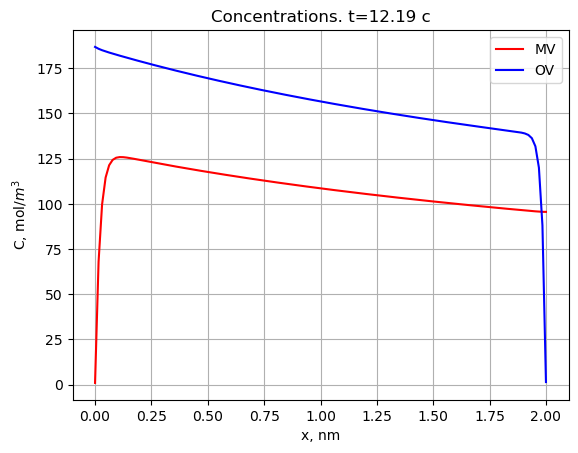

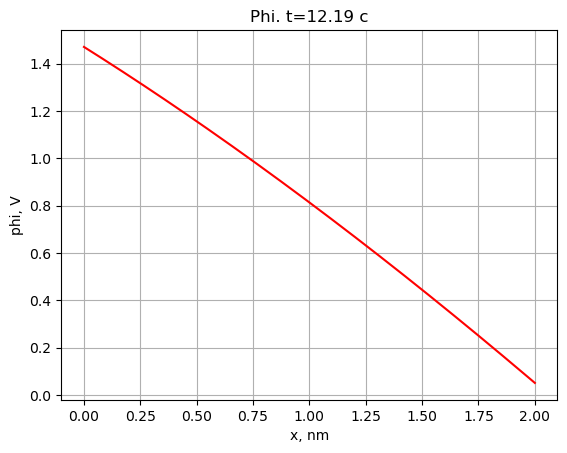

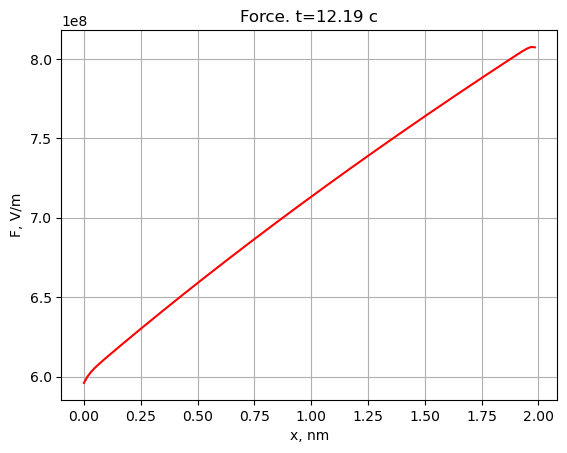

In [18]:
num = -1

if num != 0 or num != 1:
    print(np.linalg.norm(Data_C_MV[num-1] - Data_C_MV[num-2]))

plt.plot(x*A_L/10**(-9), Data_C_MV[num]*A_C, 'r', label='MV')
plt.plot(x*A_L/10**(-9), Data_C_OV[num]*A_C, 'b', label='OV')
plt.title(f'Concentrations. t={t_data[num]*A_t:.2f} c')
plt.legend()
plt.xlabel('x, nm')
plt.ylabel(r'C, mol/$m^{3}$')
plt.grid()
#plt.savefig(path+f'C({t_data[num]:.3f}).png', format='png', dpi=300)
plt.show()

plt.plot(x*A_L/10**(-9), A_phi*Data_phi[num], 'r', label='phi')
plt.title(f'Phi. t={t_data[num]*A_t:.2f} c')
plt.xlabel('x, nm')
plt.ylabel('phi, V')
plt.grid()
#plt.savefig(path+f'phi({t_data[num]:.3f}).png', format='png', dpi=300)
plt.show()

plt.plot(x[:-1]*A_L/10**(-9), A_phi/A_L*Data_E[num], 'r', label='F')
plt.title(f'Force. t={t_data[num]*A_t:.2f} c')
plt.xlabel('x, nm')
plt.ylabel('F, V/m')
#plt.ylim([A_phi/A_L*F_min*0.95, A_phi/A_L*F_max*1.05])
plt.grid()
#plt.savefig(path+f'F({t_data[num]:.3f}).png', format='png', dpi=300)
plt.show()

In [19]:
print(Data_phi[:10, :]*A_phi)

[[1.47548745 1.46782728 1.4600221  ... 0.07890915 0.06585888 0.05272725]
 [1.47370298 1.46548516 1.45715565 ... 0.07932139 0.06620772 0.05300654]
 [1.47204919 1.46331457 1.45449148 ... 0.07987627 0.06666988 0.05337654]
 ...
 [1.46592904 1.45528187 1.44461788 ... 0.08326922 0.06948815 0.05563288]
 [1.46512143 1.45422188 1.44331442 ... 0.08395671 0.07006001 0.05609072]
 [1.46442816 1.45331196 1.44219511 ... 0.08461863 0.07061085 0.05653173]]


##       $k_2$ plot

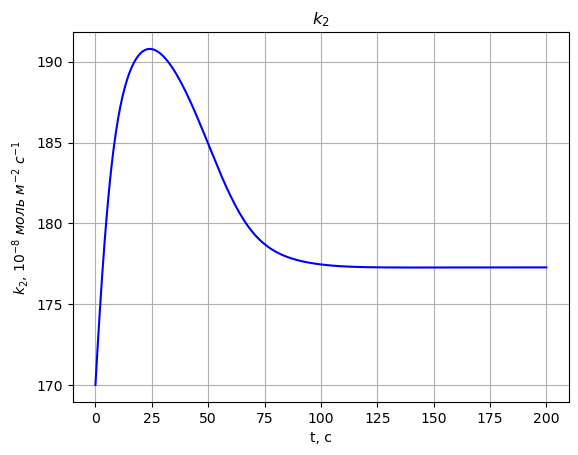

In [20]:
plt.plot(Data_k2, 'b')
#plt.plot([t_data[0], t_data[-1]], [k5, k5], 'k--')
plt.xlabel('t, c')
plt.title(r'$k_2$')
plt.ylabel(r'$k_2$, $10^{-8}$ $моль$ $м^{-2}$ $с^{-1}$')
plt.grid()
#plt.savefig(path+f'k2.png', format='png', dpi=300)
plt.show()

## Concentrarion gifs

In [ ]:
# Concentrarion gifs
Nt_gif = min(4000, Ndata)

C_max = max(np.max(Data_C_MV[:Nt_gif, :]), np.max(Data_C_OV[:Nt_gif, :]))
def update_plot(num):
    plt.cla()
    plt.plot(x*0.1, Data_C_MV[num]*A_c, 'r', label='MV')
    plt.plot(x*0.1, Data_C_OV[num]*A_c, 'b', label='OV')
    plt.title(f'Concentrations. t={t_data[num]*A_t:.3f} c')
    plt.legend()
    plt.ylim([0, A_c * C_max*1.1])
    #plt.xlim([0, L*0.1])
    plt.xlabel('x, нм')
    plt.ylabel(r'C, моль/$м^{3}$')
    plt.grid()

fig = plt.figure()
ani = animation.FuncAnimation(fig, update_plot, Nt_gif)
#ani.save(path+'C.gif', writer='pillow', fps=24)

## Potential gifs

In [ ]:
Nt_gif = min(4000, Ndata)

def update_plot(num):
    plt.cla()
    plt.plot(x*0.1, Data_phi[num]*A_phi, 'b')
    plt.title(f'Potential. t={t_data[num]*A_t:.3f} c')
    plt.xlabel('x, нм')
    plt.ylabel(r'$\phi$, В')
    plt.ylim([0, phi_ext*1.1*A_phi])
    plt.grid()
    
fig = plt.figure()
ani = animation.FuncAnimation(fig, update_plot, Nt_gif)
#ani.save(path+f'phi.gif', fps=24)

## Electric field gif

In [ ]:
Nt_gif = min(4000, Ndata)

E_max = np.max(Data_E)
E_min = np.min(Data_E)
def update_plot(num):
    plt.cla()
    plt.plot(x[:-1]*0.1, A_phi/A_L*Data_E[num], 'r', label='F')
    plt.title(f'Electric field. t={t_data[num]*A_t:.3f} c')
    plt.xlabel('x, нм')
    plt.ylabel('E, В/м')
    plt.ylim([A_phi/A_L*E_min*0.95, A_phi/A_L*E_max*1.05])
    plt.grid()

fig = plt.figure()
ani = animation.FuncAnimation(fig, update_plot, Nt_gif)
#ani.save(path+f'E.gif', fps=24)